- 분석 제공 대상이 의사
- 목표 변수 : '수술시간'
- 설명 변수 지정 최소 5개 이상(범주형과 연속형 섞여 있음)
- DDA/README.md : 변수 설명/데이터 type/이유
- 추출, 수술시간이 중앙값 이상인 것.
- 요약 : 수술시간에 가장 영향을 주는 항목 3가지 확인

In [1]:
import pandas as pd


In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')

In [3]:
df_ROS.columns


Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

### 수술기법에 따라 수술시간 추이 확인

In [4]:
df_ROS_Q = df_ROS[['수술기법', '연령', '환자통증정도','수술실패여부','수술시간','척추전방위증']]
# df_ROS_Q.iloc[:3]
df_ROS_Q

,수술기법,연령,환자통증정도,수술실패여부,수술시간,척추전방위증
0,TELD,66,10,0,68.0,0
1,TELD,47,10,0,31.0,0
2,TELD,39,7,0,78.0,0
3,TELD,40,7,0,73.0,0
4,TELD,42,7,0,29.0,0
...,...,...,...,...,...,...
1889,NaN,59,7,0,80.0,0
1890,NaN,42,7,0,20.0,0
1891,IELD,61,7,0,50.0,0
1892,NaN,29,7,0,25.0,0


In [5]:
df_ROS_Q.pivot_table(index='수술시간', columns=[ '수술기법', '연령', '환자통증정도','수술실패여부','척추전방위증'], aggfunc= 'size')


수술기법   IELD                                      ... TELD                      \
연령       17  18      20  21      22      23      ...   77          78      79   
환자통증정도   8   8   9   9   6   8   1   7   2   7   ...   7   9   10  7   8   7    
수술실패여부    0   0   0   0   0   0   0   0   0   0  ...    0   0   1   0   0   0   
척추전방위증    0   0   0   0   0   0   0   0   0   0  ...    1   0   0   0   0   0   
수술시간                                             ...                            
5.0     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
6.0     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
7.0     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
10.0    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
12.0    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
...     ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..   
152.0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
155.0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
165.0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
190.0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   
220.0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN NaN NaN NaN   

수술기법                    
연령              80  84  
환자통증정도          7   7   
수술실패여부       1   0   0  
척추전방위증   1   0   0   0  
수술시간                    
5.0    NaN NaN NaN NaN  
6.0    NaN NaN NaN NaN  
7.0    NaN NaN NaN NaN  
10.0   NaN NaN NaN NaN  
12.0   NaN NaN NaN NaN  
...     ..  ..  ..  ..  
152.0  NaN NaN NaN NaN  
155.0  NaN NaN NaN NaN  
165.0  NaN NaN NaN NaN  
190.0  NaN NaN NaN NaN  
220.0  NaN NaN NaN NaN  

[133 rows x 584 columns]

In [6]:
df_ROS_Q['수술시간'].median()  # 수술시간의 중앙값


60.0

In [7]:
median_surgery_time = df_ROS_Q['수술시간'].median()   # 수술시간이 중앙값 이상인 데이터 추출 
df_ROS_Q_M = df_ROS_Q[df_ROS_Q['수술시간'] >= median_surgery_time]
df_ROS_Q_M

,수술기법,연령,환자통증정도,수술실패여부,수술시간,척추전방위증
0,TELD,66,10,0,68.0,0
2,TELD,39,7,0,78.0,0
3,TELD,40,7,0,73.0,0
7,TELD,55,7,0,85.0,0
12,TELD,35,7,0,94.0,0
...,...,...,...,...,...,...
1876,NaN,64,7,0,110.0,0
1877,NaN,51,7,0,90.0,0
1885,NaN,42,6,0,70.0,0
1887,NaN,34,7,0,75.0,0


In [8]:
import numpy as np


In [9]:
df_ROS_Q_M.pivot_table(index='수술시간', columns='수술기법', aggfunc='size') # 수술기법 중 'TELD'를 사용하면 수술시간이 짧은것으로 확인 


수술기법,IELD,TELD
수술시간,,
60.0,9.0,107.0
61.0,3.0,17.0
62.0,NaN,15.0
63.0,NaN,16.0
64.0,NaN,12.0
...,...,...
152.0,NaN,1.0
155.0,NaN,1.0
165.0,NaN,1.0


In [10]:
df_ROS_Q_M.pivot_table(index='수술시간', columns='환자통증정도', aggfunc='size') #대략 수술시간의 평균치에 통증정도는 7~8단계로 비교적 높은수치를 나타냄

환자통증정도,1,2,3,4,5,6,7,8,9,10
수술시간,,,,,,,,,,
60.0,5.0,3.0,NaN,1.0,6.0,3.0,48.0,30.0,15.0,8.0
61.0,NaN,2.0,2.0,NaN,1.0,1.0,9.0,3.0,3.0,NaN
62.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,2.0,2.0
63.0,3.0,3.0,NaN,NaN,NaN,NaN,8.0,2.0,1.0,NaN
64.0,NaN,2.0,1.0,NaN,NaN,NaN,7.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
152.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [11]:
df_ROS_Q_M.pivot_table(index='수술시간', columns='수술실패여부', aggfunc='size') # 수술시간이 길수록 수술실패여부가 높은 편임 

수술실패여부,0,1
수술시간,,
60.0,113.0,6.0
61.0,20.0,1.0
62.0,15.0,NaN
63.0,17.0,NaN
64.0,11.0,1.0
...,...,...
152.0,NaN,1.0
155.0,1.0,NaN
165.0,NaN,1.0


In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl  # 한글처리 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [13]:
df_ROS_Q_M.describe(include=object).columns #범주형 확인 

Index(['수술기법'], dtype='object')

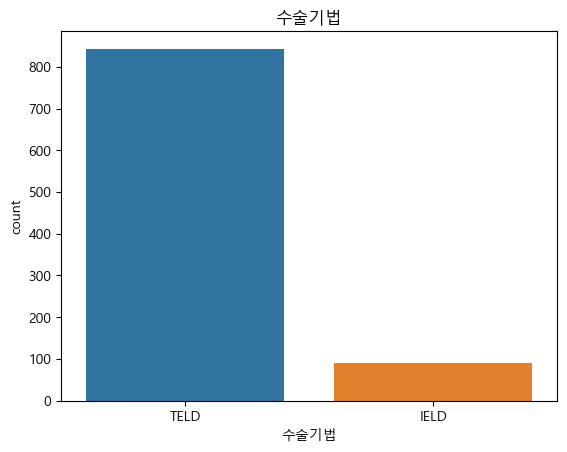

In [14]:
sns.countplot(data=df_ROS_Q_M, x='수술기법')# 빈도수를 확인 
plt.title("수술기법")
plt.show()

In [15]:
continous_list = df_ROS_Q_M.describe().columns #연속형 확인
continous_list

Index(['연령', '환자통증정도', '수술실패여부', '수술시간', '척추전방위증'], dtype='object')

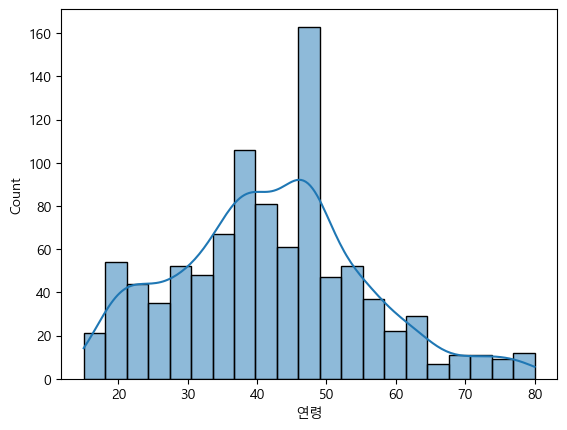

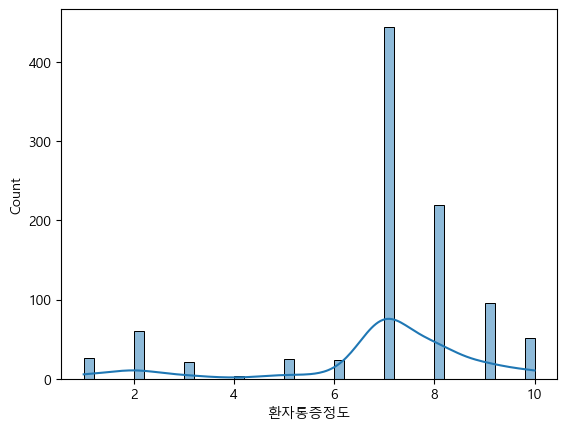

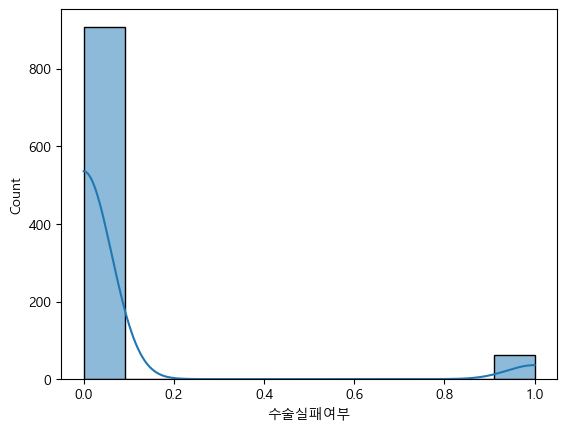

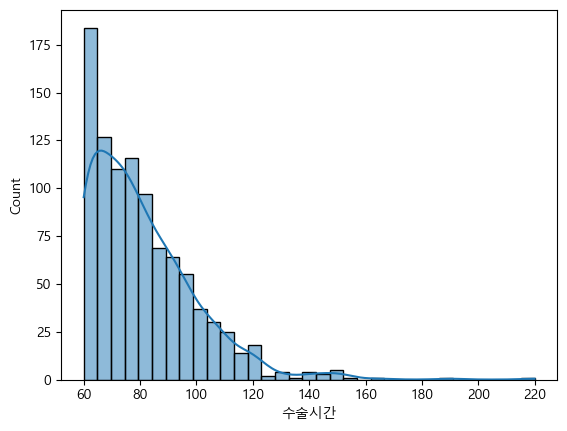

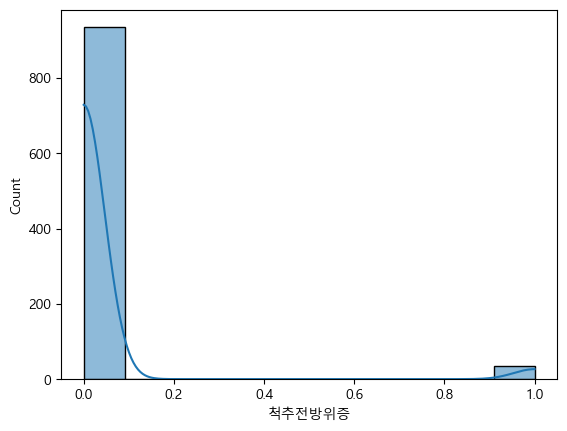

In [16]:
for  continous in continous_list : 
    sns.histplot(data=df_ROS_Q_M, x=continous, kde=True) # 연속형 histplot그래프 사용 
    plt.show()

## 수술실패여부와 척주전방위증 데이터 변환필요

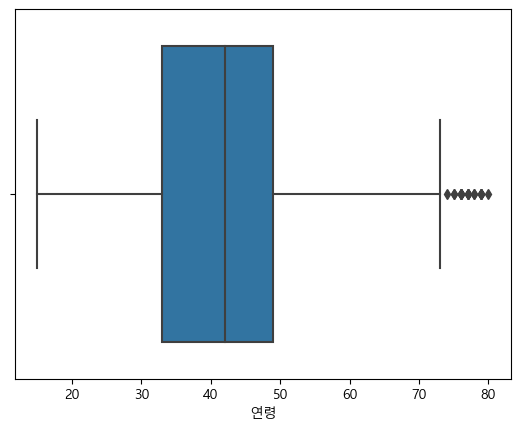

In [17]:
sns.boxplot(data=df_ROS_Q_M, x='연령') 
plt.show()

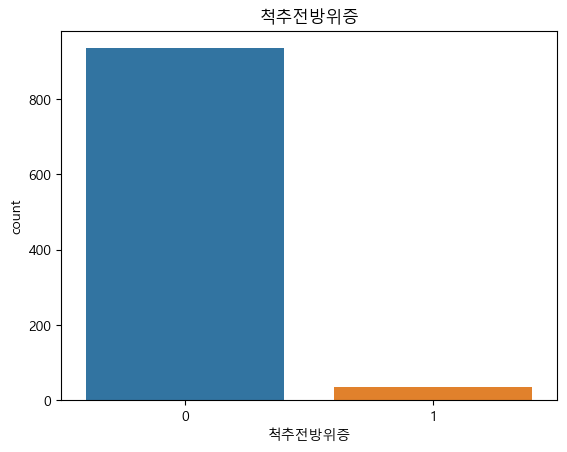

In [18]:
sns.countplot(data=df_ROS_Q_M, x='척추전방위증')# 빈도수를 확인 
plt.title("척추전방위증")
plt.show()

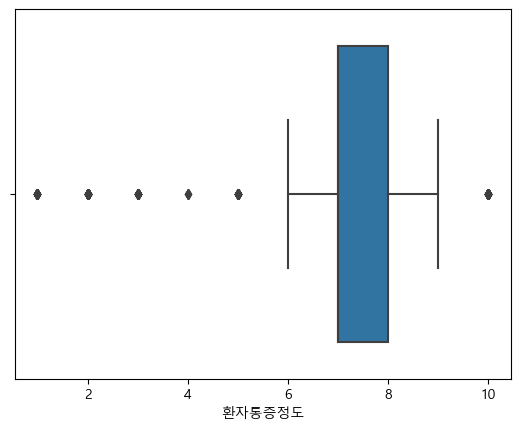

In [19]:
sns.boxplot(data=df_ROS_Q_M, x='환자통증정도') 
plt.show()

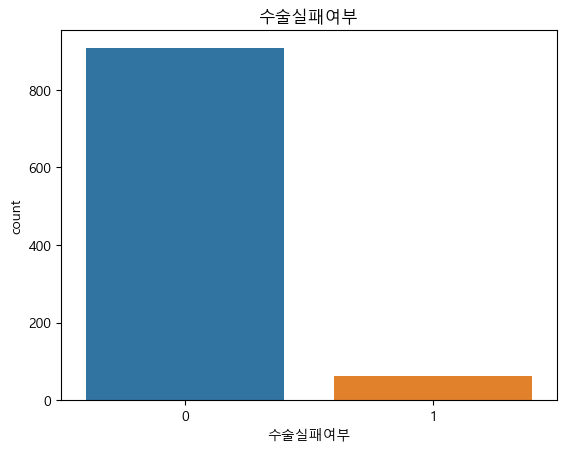

In [20]:
sns.countplot(data=df_ROS_Q_M, x='수술실패여부')# 빈도수를 확인 
plt.title("수술실패여부")
plt.show()

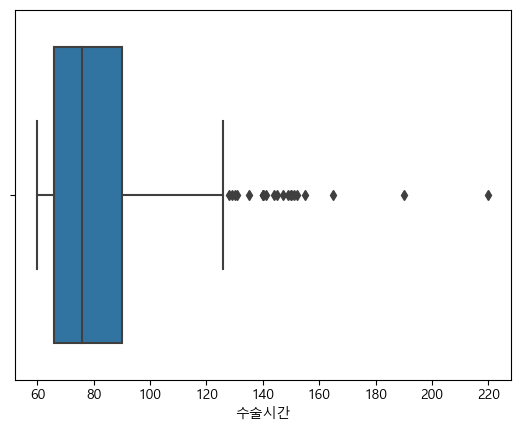

In [21]:
sns.boxplot(data=df_ROS_Q_M, x='수술시간') 
plt.show()